In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [28]:
#loading data to the environment

car_data=pd.read_csv('/content/car_age_price.csv')
car_data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


Printing basic details of data

In [61]:
print(car_data.info(), '\n')
print(car_data.head(), '\n')
print(car_data.shape, '\n')
print(car_data.describe(), '\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None 

   Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000 

(112, 2) 

              Year          Price
count   112.000000     112.000000
mean   2016.669643  483866.044643
std       1.629616   91217.450533
min    2013.000000  300000.000000
25%    2015.000000  423750.000000
50%    2017.000000  500000.000000
75%    2017.000000  550000.000000
max    2020.000000  755000.000000 



In [62]:
#checking for null values
car_data.isna().sum()

Year     0
Price    0
dtype: int64

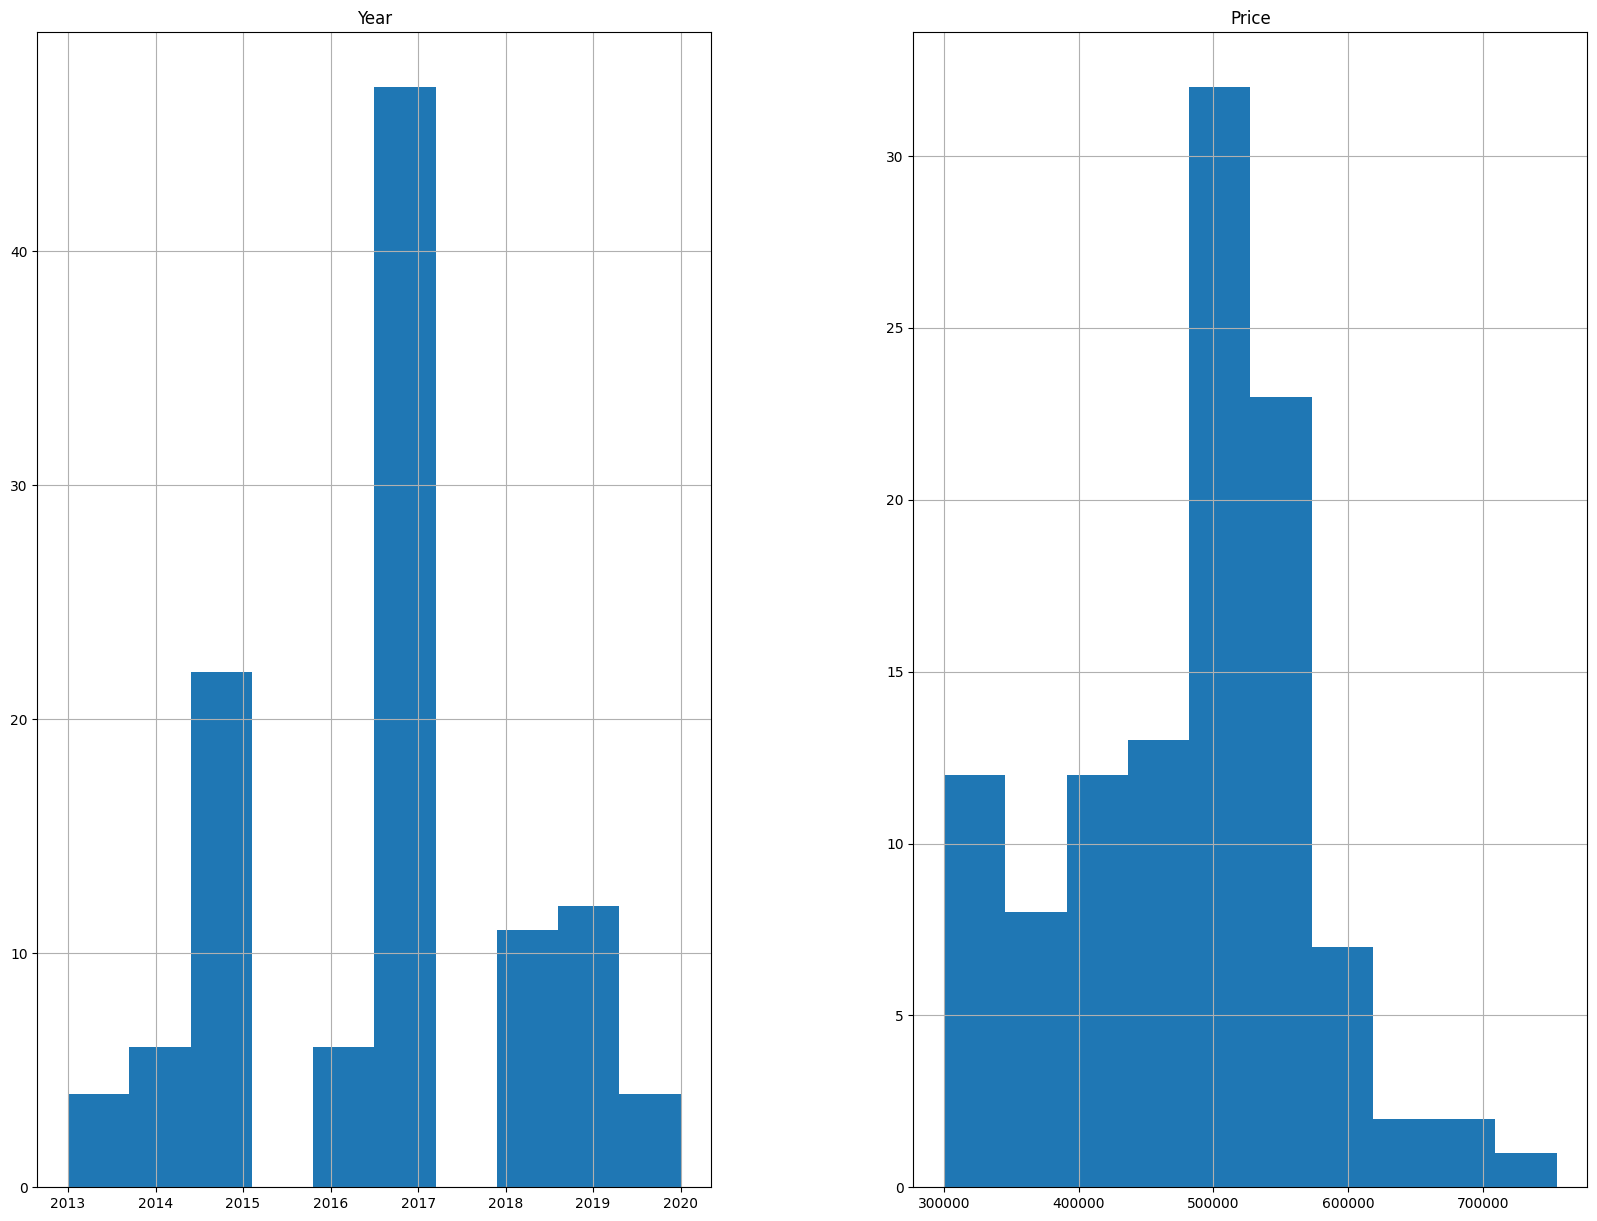

In [34]:
#frequency graph

freqgraph = car_data.select_dtypes('int64')
freqgraph.hist(figsize = (20,15))
plt.show()


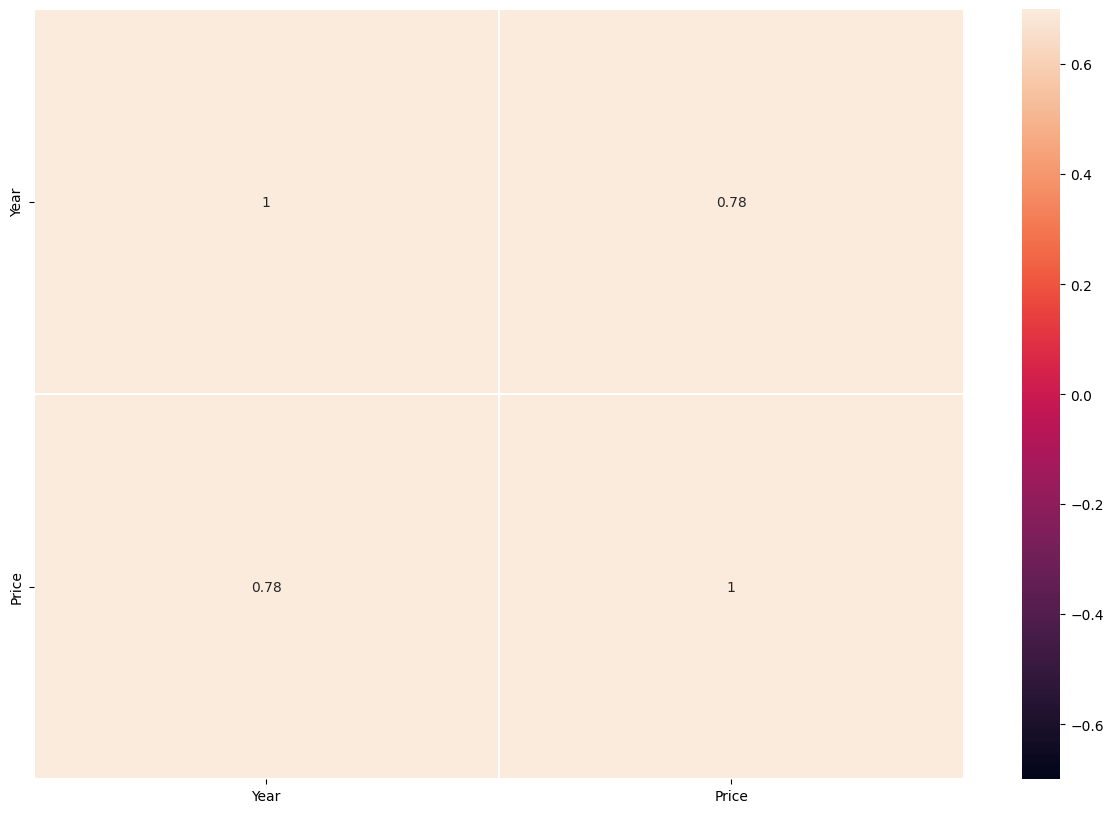

In [35]:
#finding correlation
plt.subplots(figsize = (15,10))
sns.heatmap(car_data.corr(),vmin = -0.7, vmax = 0.7, annot = True, linewidths = 0.2)
plt.show()

Linear Regression & Lasso Regression

In [36]:
#Splitting feautures and target variables

y_data = car_data['Price']
x_data = car_data.drop(['Price'], axis = 1)

In [37]:
#split the data into training and testing sets. We'll allocate 75% of the data for training and 25% for testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 42, test_size = .25)


Train both linear regression and Lasso regression models.

In [51]:
# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [53]:
# Evaluate linear regression  model using MSE
lr_predictions = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Linear Regression MSE:", lr_mse)

Linear Regression MSE: 3878767151.073449


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [54]:
# Train Lasso regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [56]:
# Evaluate Lasso regression model using MSE
lasso_predictions = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression MSE:", lasso_mse)

Lasso Regression MSE: 3878764025.5442586


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


we'll use the better performing model (the one with lower MSE) to predict the price of a 2022 model second-hand Grand i10.

In [57]:
# Assuming 2022 is represented as [[2022]]
year_2022 = np.array([[2022]])

# Predict price using the better performing model
if lr_mse < lasso_mse:
    predicted_price = lr_model.predict(year_2022)
    print("Predicted price of a 2022 model second-hand Grand i10 (Linear Regression):", predicted_price[0])
else:
    predicted_price = lasso_model.predict(year_2022)
    print("Predicted price of a 2022 model second-hand Grand i10 (Lasso Regression):", predicted_price[0])


Predicted price of a 2022 model second-hand Grand i10 (Lasso Regression): 740159.9031400383
